# Kr analysis (run 3614)

# Notebook configuration

In [1]:
outputfolder  = "plots/"
save_plots    = False
inputfilename = "/Users/Gonzalo/github/NEXTdata/Kr/run3389.dst"

In [2]:
from __future__ import print_function, division

import os
import functools
import textwrap
import time
import glob
print("Running on ", time.asctime())

import numpy             as np
import matplotlib.pyplot as plt

import invisible_cities.core.core_functions as coref
import invisible_cities.core.fit_functions  as fitf
import invisible_cities.reco.dst_functions  as dstf

pi = np.pi

coref = fitf

Running on  Fri May  5 20:24:04 2017


#### General plotting options

In [3]:
%matplotlib inline

plt.rcParams["figure.figsize"]          = 8, 6
plt.rcParams["font.size"]               = 15
plt.rcParams["figure.max_open_warning"] = 100

profOpt = "--k"
fitOpt  = "r"
XR1Opt  = "k"
XR2Opt  = "c"

if not os.path.exists(outputfolder):
    os.mkdir(outputfolder)

#### Useful functions

In [4]:
def labels(xlabel, ylabel):
    """
    Set x and y labels.
    """
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)


def hist(*args, **kwargs):
    """
    Create a figure and then the histogram
    """
    plt.figure()
    return plt.hist(*args, **kwargs)


def doublehist(data1, data2, lbls, *args, **kwargs):
    """
    Create a figure and then the histogram
    """
    plt.figure()
    h1 = plt.hist(data1, *args, label=lbls[0], alpha=0.5, normed=True, **kwargs)
    h2 = plt.hist(data2, *args, label=lbls[1], alpha=0.5, normed=True, **kwargs)
    return h1, h2, plt.legend()

    
def hist2d(*args, **kwargs):
    """
    Create a figure and then the histogram
    """
    plt.figure()
    return plt.hist2d(*args, **kwargs)

    
def pdf(data, *args, **kwargs):
    """
    Create a normalized histogram with appropiate range.
    """
    data = np.array(data)
    h = hist(data, *args, **kwargs, weights=np.ones_like(data)/len(data))
    plt.yscale("log")
    plt.ylim(1e-4, 1.)
    return h
    
def scatter(*args, **kwargs):
    """
    Create a figure and then a scatter plot
    """
    plt.figure()
    return plt.scatter(*args, **kwargs)


def profile_and_scatter(x, y, z, nbin, *args, **kwargs):
    """
    Create a figure and then a scatter plot
    """
    plt.figure()
    x, y, z, ze = fitf.profileXY(x, y, z, *nbin, *args, **kwargs)
    x_ = np.repeat(x, x.size)
    y_ = np.tile  (y, y.size)
    z_ = z.flatten()
    return (x, y, z, ze), plt.scatter(x_, y_, c=z_, marker="s"), plt.colorbar()


def doublescatter(x1, y1, x2, y2, lbls, *args, **kwargs):
    """
    Create a figure and then a scatter plot
    """
    plt.figure()
    sc1 = plt.scatter(x1, y1, *args, label=lbls[0], **kwargs)
    sc2 = plt.scatter(x2, y2, *args, label=lbls[1], **kwargs)
    return sc1, sc2, plt.legend()

def covariance(x, y):
    cov = np.cov(x, y)
    l, v = np.linalg.eig(cov)
    lx, ly = l**0.5
    vx, vy = v.T
    x0, y0 = np.mean(x), np.mean(y)
    x1     = lx * vx[0]
    y1     = lx * vx[1]
    plt.arrow(x0, y0, x1, y1, head_width=0.1*ly, head_length=0.1*lx, fc='r', ec='r')
    x1     = ly * vy[0]
    y1     = ly * vy[1]
    plt.arrow(x0, y0, x1, y1, head_width=0.1*lx, head_length=0.1*ly, fc='r', ec='r')
    return l, v

def reso(values, ene=29.6):
    _, mu, sigma = values
    r = 235. * sigma/mu
    return r, r * (ene/2458)**0.5

def gausstext(values, ene=29.6):
    return textwrap.dedent("""
        $\mu$ = {:.1f}
        $\sigma$ = {:.2f}
        R = {:.3}%
        Rbb = {:.3}%""".format(*values[1:], *reso(values, ene)))

def save_to_folder(save_plots, outputfolder, name):
    """
    Set title and save plot in folder.
    """
    plt.title(name)
    if save_plots:
        plt.savefig("{}/{}.png".format(outputfolder, name), dpi=100)

save = functools.partial(save_to_folder, save_plots, outputfolder)

### Input data

In [5]:
ifile = os.path.expandvars(inputfilename)
print("ifile:", ifile)

ifile: /Users/Gonzalo/github/NEXTdata/Kr/run3389.dst


# Read data

In [6]:
full = dstf.load_dst(ifile, "DST", "Events")
full.head()

,event,time,peak,nS2,S1w,S1h,S1e,S1t,S2w,S2h,...,S2t,Nsipm,DT,Z,X,Y,R,Phi,Xrms,Yrms
0,10,1.490299e+09,0,1,175.0,2.001530,9.195722,526500.0,7.850000,1760.124390,...,653187.5,3,126.6875,126.6875,121.761582,27.240410,124.771483,0.220095,4.694699,4.18312
1,12,1.490299e+09,0,1,350.0,1.333540,11.618336,492175.0,8.207313,1114.189697,...,652712.5,2,160.5375,160.5375,-110.719067,35.000000,116.119386,2.835417,4.977362,0.00000
2,14,1.490299e+09,0,1,275.0,1.316907,6.871000,576350.0,6.079562,1886.400269,...,652537.5,2,76.1875,76.1875,-175.000000,-59.651885,184.887391,-2.813076,0.000000,5.00644
3,18,1.490299e+09,0,1,200.0,2.950729,13.812014,587900.0,5.989813,2827.022949,...,652412.5,4,64.5125,64.5125,-15.027502,-46.712307,49.070005,-1.882044,6.028039,3.77384
4,24,1.490299e+09,0,1,100.0,1.287624,4.552865,504525.0,8.008188,1226.703369,...,652837.5,2,148.3125,148.3125,0.927833,5.000000,5.085359,1.387317,4.943756,0.00000


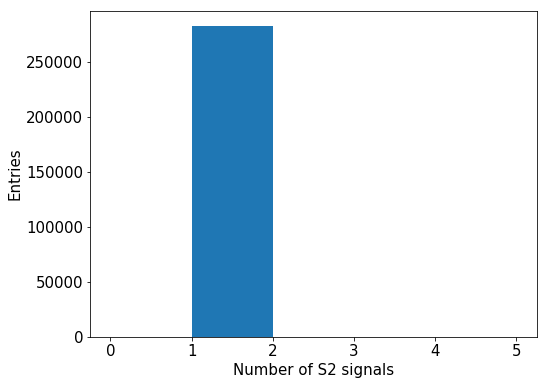

In [7]:
hist(full.nS2, 5, (0,5))
labels("Number of S2 signals", "Entries")

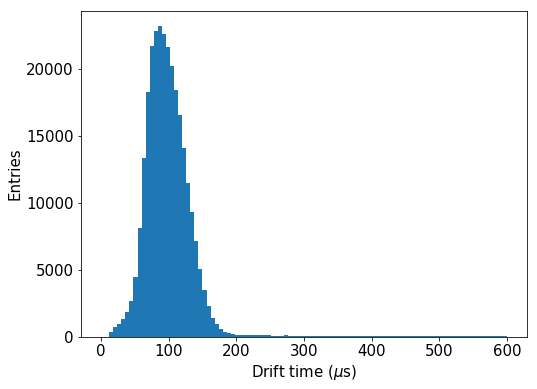

In [8]:
hist(full.Z, 100, (0,600))
labels("Drift time ($\mu$s)", "Entries")

In [9]:
XRrange = 2e3, 1e4
PPrange = 4e4, 1e5
7000/41.5*511

86192.77108433735

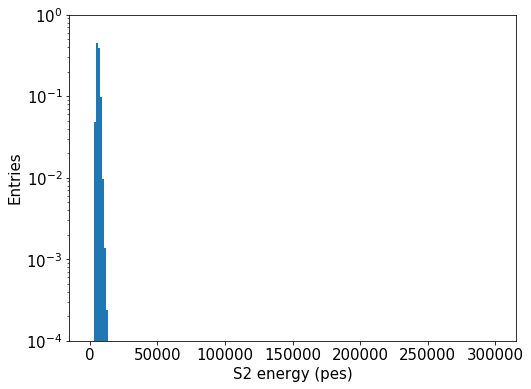

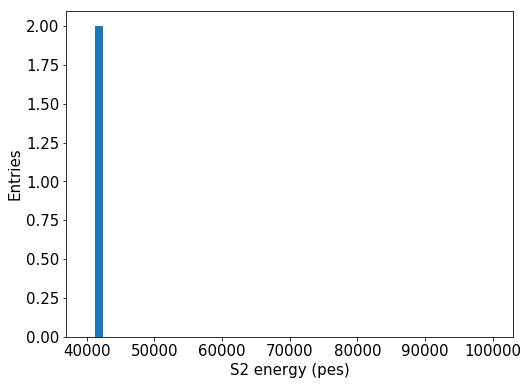

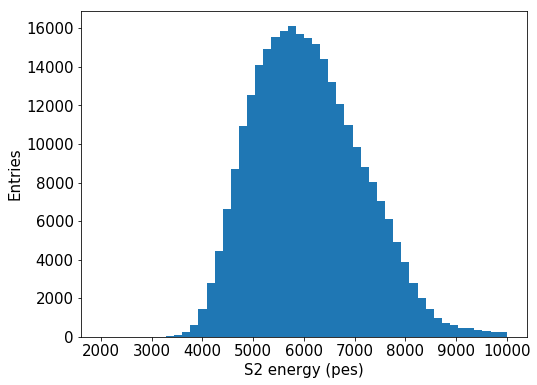

In [10]:
pdf(full.S2e, 200, (0,3e5))
labels("S2 energy (pes)", "Entries")

hist(full.S2e, 50, PPrange)
labels("S2 energy (pes)", "Entries")

hist(full.S2e, 50, XRrange)
labels("S2 energy (pes)", "Entries")

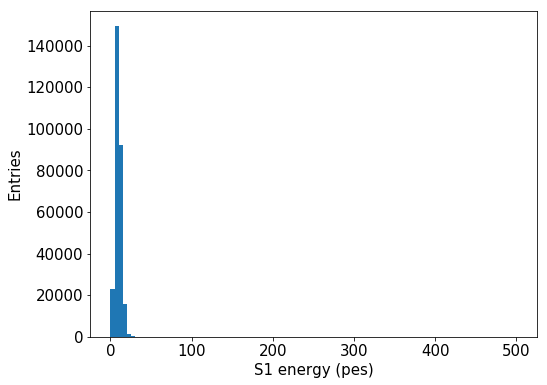

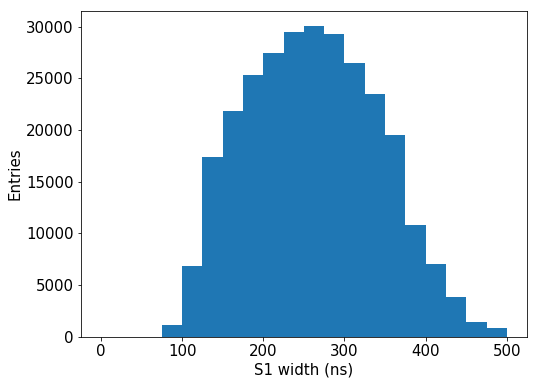

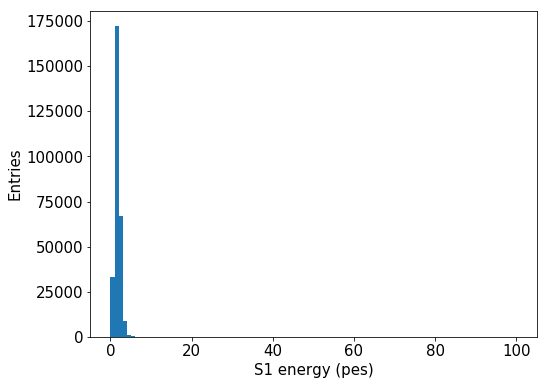

In [11]:
bins = np.linspace(0, 500, 100)
hist(full.S1e, bins)
labels("S1 energy (pes)", "Entries")

bins = np.linspace(0, 500, 21)
hist(full.S1w, bins)
labels("S1 width (ns)", "Entries")

bins = np.linspace(0, 100, 100)
hist(full.S1h, bins)
labels("S1 energy (pes)", "Entries")

# S2 energy vs Z

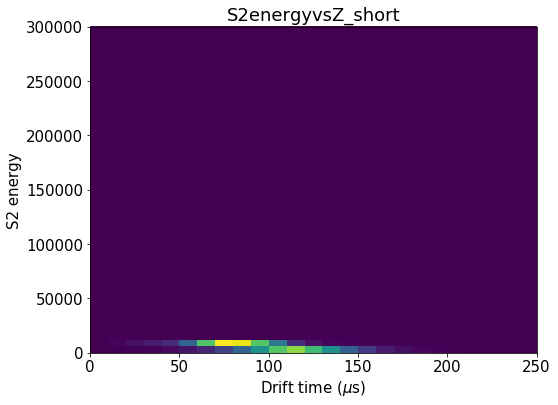

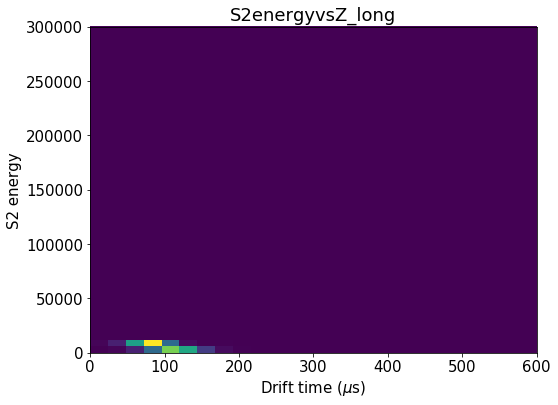

In [12]:
zrange = 0, 250
Erange = 0, 3e5
hist2d(full.Z, full.S2e, (25, 50), range=(zrange, Erange))
labels("Drift time ($\mu$s)", "S2 energy")
save("S2energyvsZ_short")

zrange = 0, 600
Erange = 0, 3e5
hist2d(full.Z, full.S2e, (25,  50), range=(zrange, Erange))
labels("Drift time ($\mu$s)", "S2 energy")
save("S2energyvsZ_long")

# Short drift time: Z < 250 $\mu$s

In [13]:
zfid   = 0, 250
shortZ = full[coref.in_range(full.Z, *zfid)]
print("Ratio:", len(shortZ)/len(full))
shortZ.head()

Ratio: 0.9811510536568089


,event,time,peak,nS2,S1w,S1h,S1e,S1t,S2w,S2h,...,S2t,Nsipm,DT,Z,X,Y,R,Phi,Xrms,Yrms
0,10,1.490299e+09,0,1,175.0,2.001530,9.195722,526500.0,7.850000,1760.124390,...,653187.5,3,126.6875,126.6875,121.761582,27.240410,124.771483,0.220095,4.694699,4.18312
1,12,1.490299e+09,0,1,350.0,1.333540,11.618336,492175.0,8.207313,1114.189697,...,652712.5,2,160.5375,160.5375,-110.719067,35.000000,116.119386,2.835417,4.977362,0.00000
2,14,1.490299e+09,0,1,275.0,1.316907,6.871000,576350.0,6.079562,1886.400269,...,652537.5,2,76.1875,76.1875,-175.000000,-59.651885,184.887391,-2.813076,0.000000,5.00644
3,18,1.490299e+09,0,1,200.0,2.950729,13.812014,587900.0,5.989813,2827.022949,...,652412.5,4,64.5125,64.5125,-15.027502,-46.712307,49.070005,-1.882044,6.028039,3.77384
4,24,1.490299e+09,0,1,100.0,1.287624,4.552865,504525.0,8.008188,1226.703369,...,652837.5,2,148.3125,148.3125,0.927833,5.000000,5.085359,1.387317,4.943756,0.00000


# S1 energy

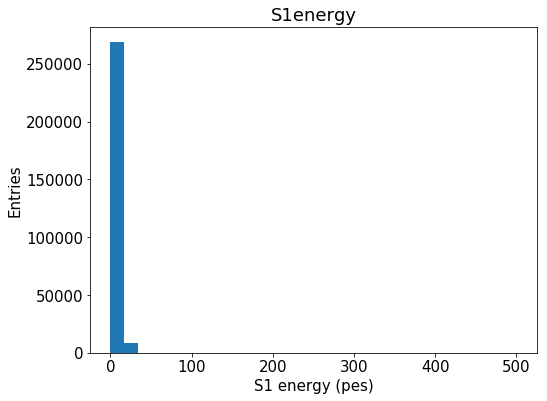

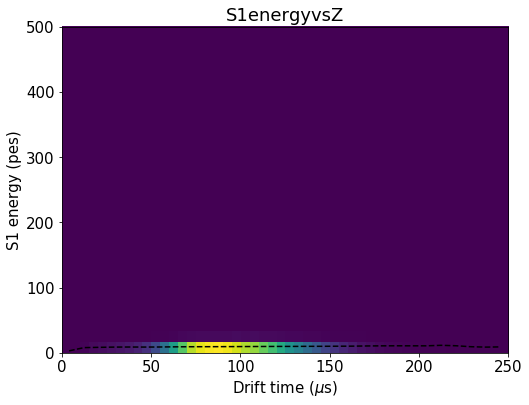

In [14]:
zrange = zfid
Srange = 0, 500

hist(shortZ.S1e, 30, range=Srange)
labels("S1 energy (pes)", "Entries")
save("S1energy")

hist2d(shortZ.Z, shortZ.S1e, (50, 30), range=(zrange, Srange))
x, y, _ = fitf.profileX(shortZ.Z, shortZ.S1e, 30, xrange=zrange, yrange=Srange)
plt.plot(x, y, profOpt)

labels("Drift time ($\mu$s)", "S1 energy (pes)")
save("S1energyvsZ")

# S1 width

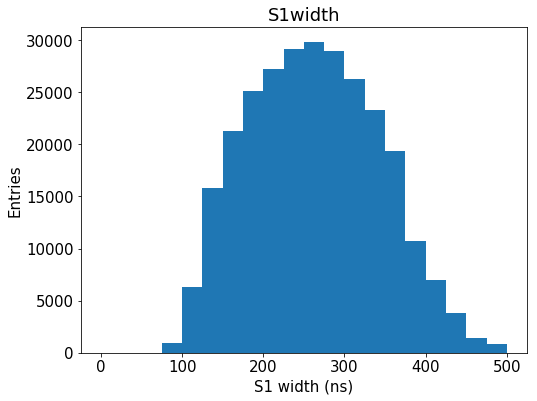

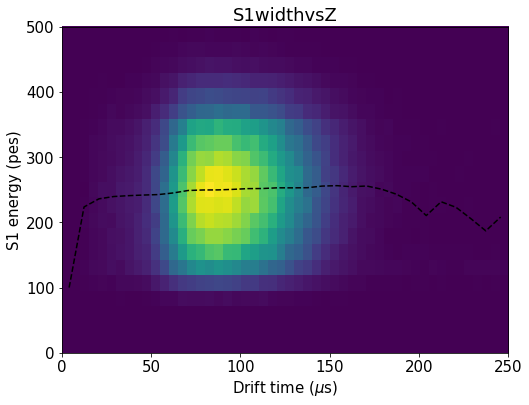

In [15]:
zrange = zfid
wrange = 0, 500

hist(shortZ.S1w, np.linspace(*wrange, 21))
labels("S1 width (ns)", "Entries")
save("S1width")

hist2d(shortZ.Z, shortZ.S1w, (50, 21), range=(zrange, wrange))
x, y, _ = fitf.profileX(shortZ.Z, shortZ.S1w, 30, xrange=zrange, yrange=wrange)
plt.plot(x, y, profOpt)

labels("Drift time ($\mu$s)", "S1 energy (pes)")
save("S1widthvsZ")

# S1 height

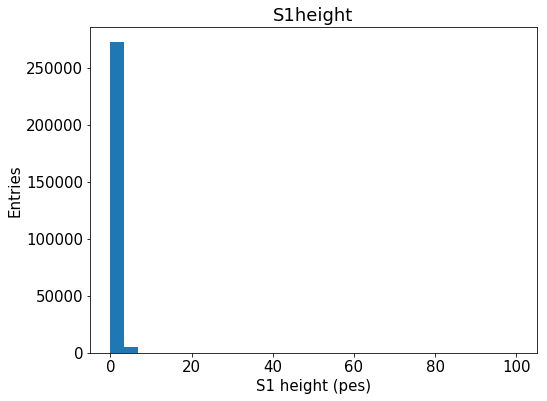

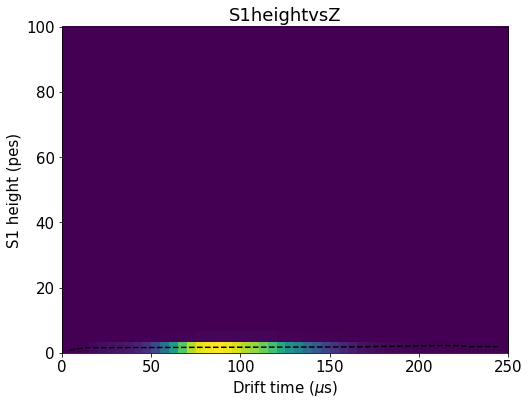

In [16]:
zrange = zfid
hrange = 0, 100

hist(shortZ.S1h, 30, range=hrange)
labels("S1 height (pes)", "Entries")
save("S1height")

hist2d(shortZ.Z, shortZ.S1h, (50, 30), range=(zrange, hrange))
x, y, _ = fitf.profileX(shortZ.Z, shortZ.S1h, 30, xrange=zrange, yrange=hrange)
plt.plot(x, y, profOpt)

labels("Drift time ($\mu$s)", "S1 height (pes)")
save("S1heightvsZ")

# S1 peak to area ratio

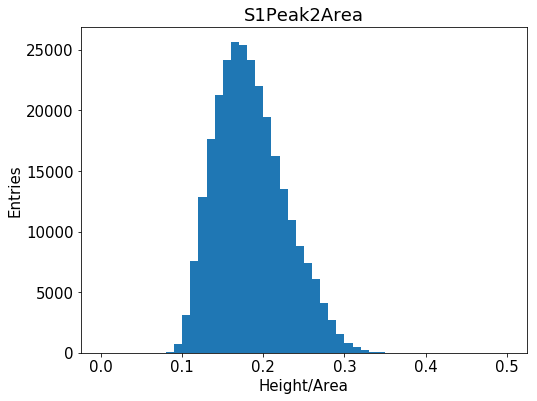

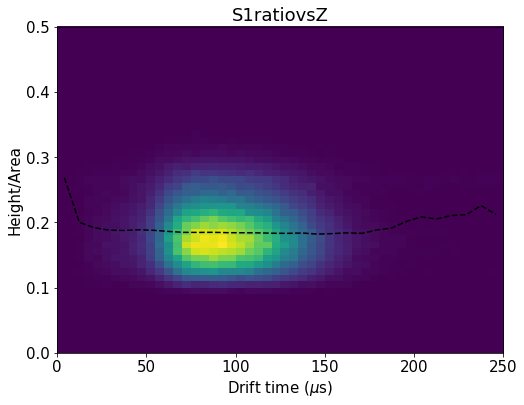

In [17]:
zrange = zfid
rrange = 0, 0.5

S1r = shortZ.S1h/shortZ.S1e
hist(S1r, 50, range=rrange)
labels("Height/Area", "Entries")
save("S1Peak2Area")

hist2d(shortZ.Z, S1r, (50, 50), range=(zrange, rrange))
x, y, _ = fitf.profileX(shortZ.Z, S1r, 30, xrange=zrange, yrange=rrange)
plt.plot(x, y, profOpt)

labels("Drift time ($\mu$s)", "Height/Area")
save("S1ratiovsZ")

# S2 energy

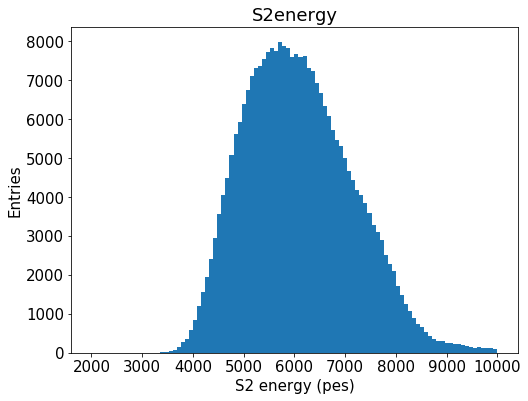

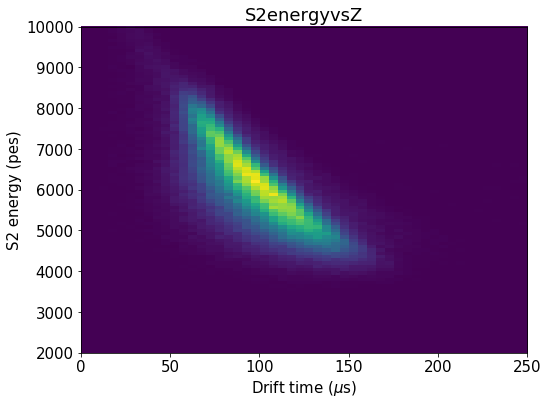

In [18]:
zrange = zfid
Erange = XRrange

hist(shortZ.S2e, 100, range=Erange)
labels("S2 energy (pes)", "Entries")
save("S2energy")

hist2d(shortZ.Z, shortZ.S2e, (50, 100), range=(zrange, Erange))
x, y, _ = fitf.profileX(shortZ.Z * 1e-3, shortZ.S2e, 30, xrange=zrange, yrange=Erange)
plt.plot(x, y, profOpt)

labels("Drift time ($\mu$s)", "S2 energy (pes)")
save("S2energyvsZ")

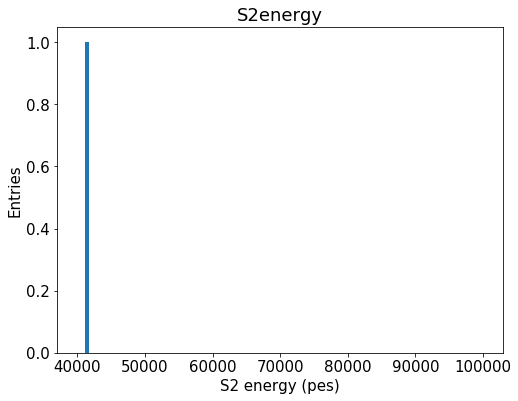

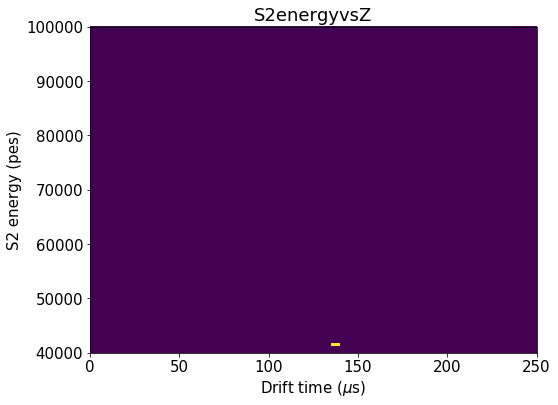

In [19]:
zrange = zfid
Erange = PPrange

hist(shortZ.S2e, 100, range=Erange)
labels("S2 energy (pes)", "Entries")
save("S2energy")

hist2d(shortZ.Z, shortZ.S2e, (50, 100), range=(zrange, Erange))
x, y, _ = fitf.profileX(shortZ.Z * 1e-3, shortZ.S2e, 30, xrange=zrange, yrange=Erange)
plt.plot(x, y, profOpt)

labels("Drift time ($\mu$s)", "S2 energy (pes)")
save("S2energyvsZ")

# S2 width

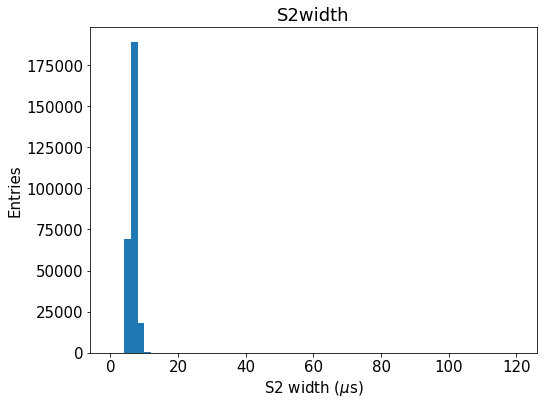

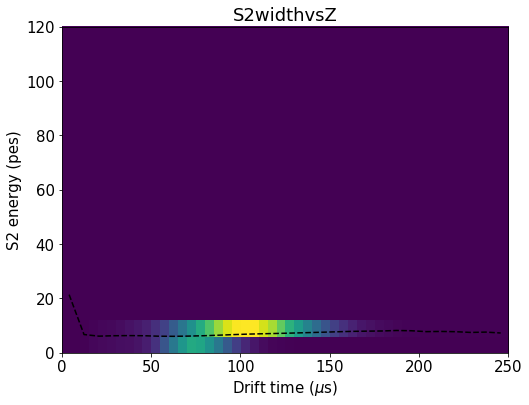

In [20]:
zrange = zfid
wrange = 0, 120

hist(shortZ.S2w, 60, range=wrange)
labels("S2 width ($\mu$s)", "Entries")
save("S2width")

hist2d(shortZ.Z, shortZ.S2w, (50, 20), range=(zrange, wrange))
x, y, _ = fitf.profileX(shortZ.Z, shortZ.S2w, 30, xrange=zrange, yrange=wrange)
plt.plot(x, y, profOpt)

labels("Drift time ($\mu$s)", "S2 energy (pes)")
save("S2widthvsZ")

# S2 height

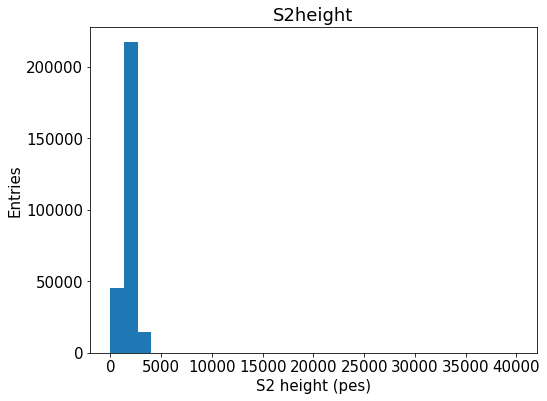

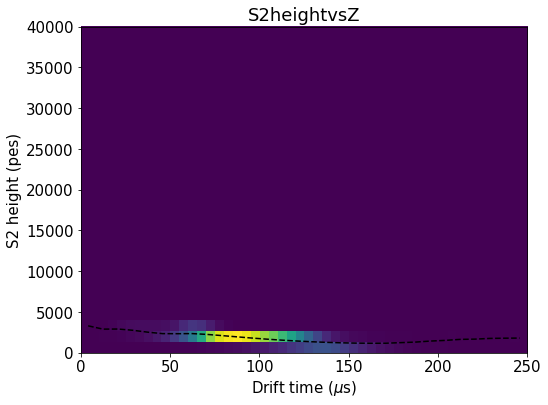

In [21]:
zrange = zfid
hrange = 0, 4e4

hist(shortZ.S2h, 30, range=hrange)
labels("S2 height (pes)", "Entries")
save("S2height")

hist2d(shortZ.Z, shortZ.S2h, (50, 30), range=(zrange, hrange))
x, y, _ = fitf.profileX(shortZ.Z, shortZ.S2h, 30, xrange=zrange, yrange=hrange)
plt.plot(x, y, profOpt)

labels("Drift time ($\mu$s)", "S2 height (pes)")
save("S2heightvsZ")

# S2 peak to area ratio

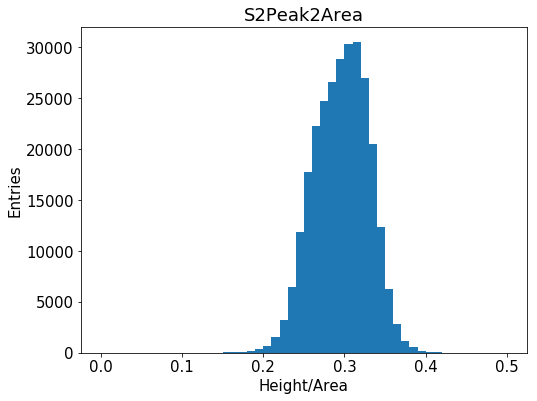

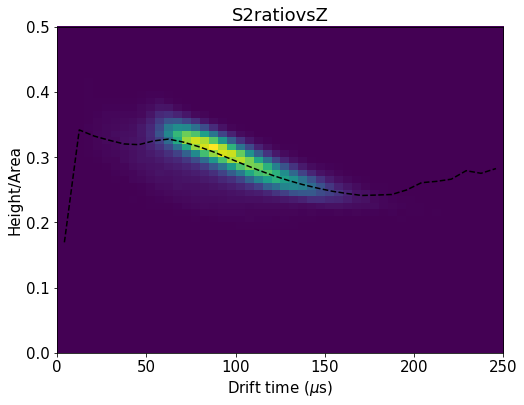

In [22]:
zrange = zfid
rrange = 0, 0.5

S2r = shortZ.S2h/shortZ.S2e

hist(S2r, 50, range=rrange)
labels("Height/Area", "Entries")
save("S2Peak2Area")

hist2d(shortZ.Z, S2r, (50, 50), range=(zrange, rrange))
x, y, _ = fitf.profileX(shortZ.Z, S2r, 30, xrange=zrange, yrange=rrange)
plt.plot(x, y, profOpt)

labels("Drift time ($\mu$s)", "Height/Area")
save("S2ratiovsZ")

# S2 vs S1

[  1.17988076e+01   1.22581681e+06] [[ -9.99999992e-01   1.30334670e-04]
 [ -1.30334670e-04  -9.99999992e-01]]


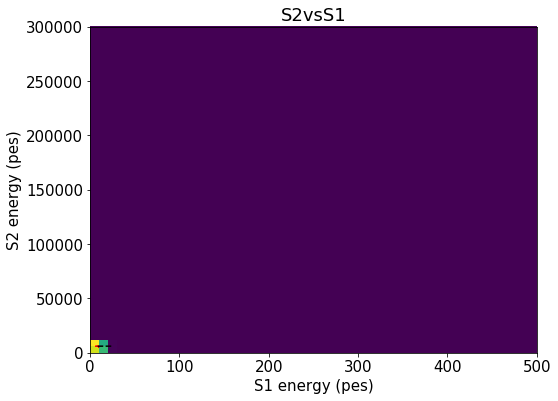

In [23]:
Srange = 0, 500
Erange = 0, 3e5

S = shortZ.S1e
E = shortZ.S2e

hist2d(S, E, (50, 50), range=(Srange, Erange))
x, y, _ = fitf.profileX(S, E, 30, xrange=Srange, yrange=Erange)
plt.plot(x, y, profOpt)

sel = fitf.in_range(S, *Srange) & coref.in_range(E, *Erange)
c = covariance(S[sel], E[sel])
print(*c)
labels("S1 energy (pes)", "S2 energy (pes)")
save("S2vsS1")

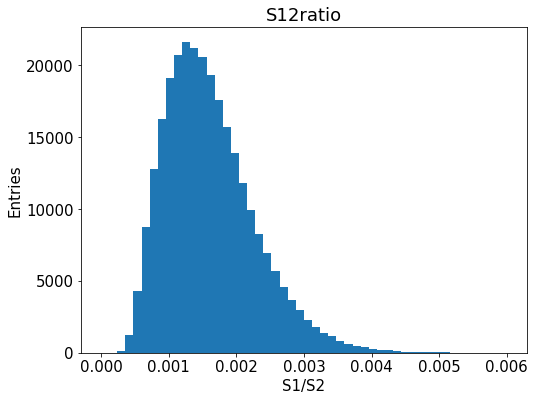

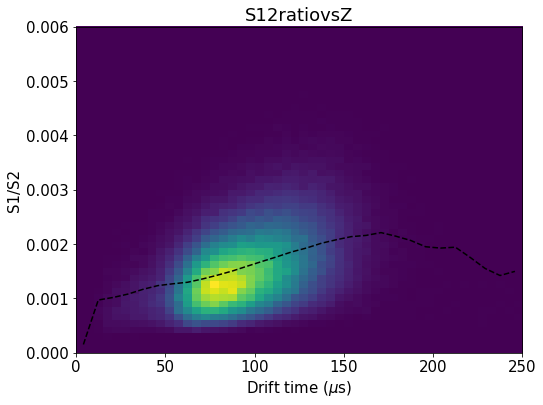

In [24]:
zrange = zfid
Rrange = 0, 0.006

S12r = shortZ.S1e/shortZ.S2e

hist(S12r, 50, range=Rrange)
labels("S1/S2", "Entries")
save("S12ratio")

hist2d(shortZ.Z, S12r, (50, 50), range=(zrange, Rrange))
x, y, _ = fitf.profileX(shortZ.Z, S12r, 30, xrange=zrange, yrange=Rrange)
plt.plot(x, y, profOpt)

labels("Drift time ($\mu$s)", "S1/S2")
save("S12ratiovsZ")

# X-rays

In [25]:
XRrange = 2e3, 1e4
XR = shortZ[coref.in_range(shortZ.S2e, 2500, 8000)]
XR.head()

,event,time,peak,nS2,S1w,S1h,S1e,S1t,S2w,S2h,...,S2t,Nsipm,DT,Z,X,Y,R,Phi,Xrms,Yrms
0,10,1.490299e+09,0,1,175.0,2.001530,9.195722,526500.0,7.850000,1760.124390,...,653187.5,3,126.6875,126.6875,121.761582,27.240410,124.771483,0.220095,4.694699,4.18312
1,12,1.490299e+09,0,1,350.0,1.333540,11.618336,492175.0,8.207313,1114.189697,...,652712.5,2,160.5375,160.5375,-110.719067,35.000000,116.119386,2.835417,4.977362,0.00000
2,14,1.490299e+09,0,1,275.0,1.316907,6.871000,576350.0,6.079562,1886.400269,...,652537.5,2,76.1875,76.1875,-175.000000,-59.651885,184.887391,-2.813076,0.000000,5.00644
4,24,1.490299e+09,0,1,100.0,1.287624,4.552865,504525.0,8.008188,1226.703369,...,652837.5,2,148.3125,148.3125,0.927833,5.000000,5.085359,1.387317,4.943756,0.00000
5,26,1.490299e+09,0,1,175.0,3.112976,14.056159,574825.0,6.913750,2746.293213,...,652787.5,3,77.9625,77.9625,27.036785,77.408401,81.994197,1.234768,4.036515,4.28569


# Temporary fiducialization

In [26]:
XRfid = XR[XR.R < 100]
print("Ratio:", len(XRfid)/len(full))
print("Ratio:", len(XRfid)/len(XR))
XRfid.head()

Ratio: 0.26312732424296087
Ratio: 0.2812994585589338


,event,time,peak,nS2,S1w,S1h,S1e,S1t,S2w,S2h,...,S2t,Nsipm,DT,Z,X,Y,R,Phi,Xrms,Yrms
4,24,1.490299e+09,0,1,100.0,1.287624,4.552865,504525.0,8.008188,1226.703369,...,652837.5,2,148.3125,148.3125,0.927833,5.000000,5.085359,1.387317,4.943756,0.000000
5,26,1.490299e+09,0,1,175.0,3.112976,14.056159,574825.0,6.913750,2746.293213,...,652787.5,3,77.9625,77.9625,27.036785,77.408401,81.994197,1.234768,4.036515,4.285690
9,36,1.490299e+09,0,1,325.0,2.103972,13.195143,548925.0,6.875000,1795.724365,...,653337.5,2,104.4125,104.4125,-65.000000,0.367701,65.001040,3.135936,0.000000,5.006664
13,48,1.490299e+09,0,1,325.0,1.156566,6.756780,546825.0,7.254562,1916.246826,...,652537.5,3,105.7125,105.7125,27.402322,48.586598,55.781223,1.057276,4.284821,4.810190
14,52,1.490299e+09,0,1,350.0,1.568818,9.186676,557625.0,7.046875,2309.461182,...,652737.5,4,95.1125,95.1125,91.070701,28.806060,95.517860,0.306347,4.895853,4.867128


# S2 energy fiducialized

[ 10522.88841399   -193.42892478]


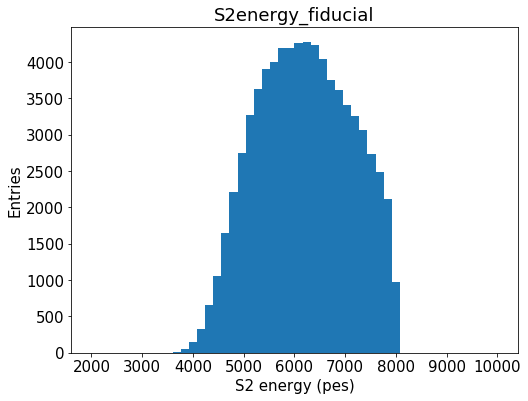

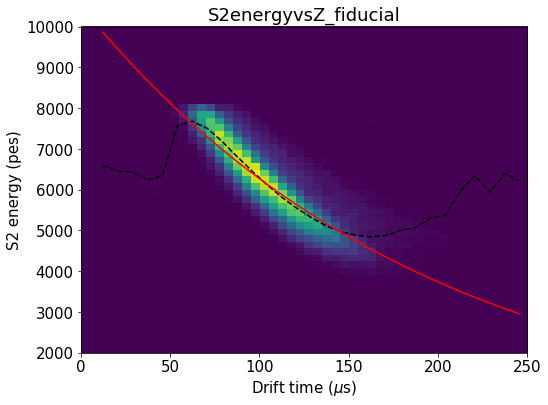

In [27]:
zrange = zfid
Erange = XRrange

hist(XRfid.S2e, 50, range=Erange)
labels("S2 energy (pes)", "Entries")
save("S2energy_fiducial")

hist2d(XRfid.Z, XRfid.S2e, (50, 50), range=(zrange, Erange))
x, y, _ = fitf.profileX(XRfid.Z, XRfid.S2e, 30, xrange=zrange, yrange=Erange)
plt.plot(x, y, profOpt)

f = fitf.fit(fitf.expo, x, y, (1e4, -200), fit_range=(50, 150))
plt.plot(x, f.fn(x), fitOpt)
print(f.values)
labels("Drift time ($\mu$s)", "S2 energy (pes)")
save("S2energyvsZ_fiducial")

zfun  = f.fn
zmin  = np.min(x)
zcorr = lambda z: zfun(zmin)/zfun(z)

# Correction by attachment

[  9.99973056e+05   8.20000000e+03   8.00000000e+02   5.00000000e+04
   9.20000000e+03   2.65885198e+02]
[  8.89332069e+03  -2.67704557e+10]


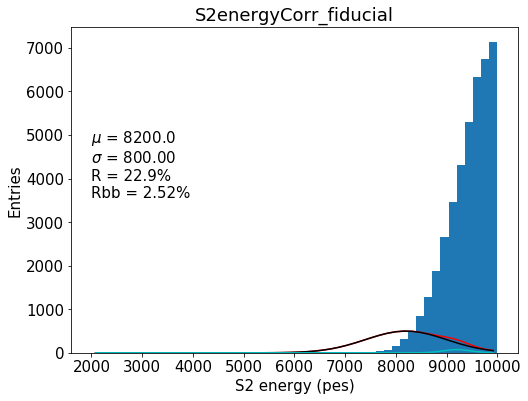

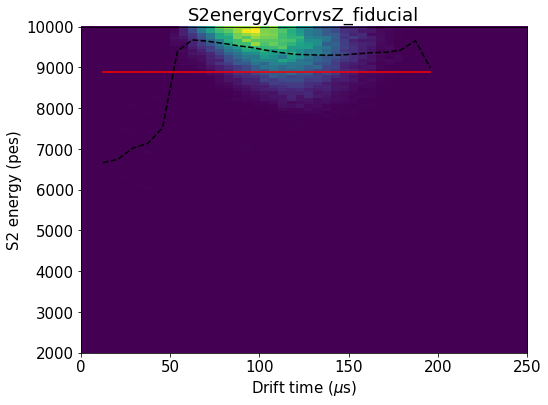

In [28]:
zrange = zfid
Erange = XRrange

E = XRfid.S2e * zcorr(XRfid.Z)

y, x, _ = hist(E, 50, range=Erange)

x    = x[:-1] + np.diff(x) * 0.5
fun  = lambda x, *args: fitf.gauss(x, *args[:3]) + fitf.gauss(x, *args[3:])
seed = 1e3, 7500, 100, 1e3, 9000, 200
low  =  10, 7000,  50,  10, 8500, 100
upp  = 1e6, 8200, 800, 5e4, 9200, 800
f    = fitf.fit(fun, x, y, seed, fit_range=(6000, 10000), bounds=(low, upp))
print(f.values)


plt.plot(x, f.fn(x), fitOpt)
plt.plot(x, fitf.gauss(x, *f.values[:3]), XR1Opt)
plt.plot(x, fitf.gauss(x, *f.values[3:]), XR2Opt)
plt.text(Erange[0], max(y)/2, gausstext(f.values[:3]))

labels("S2 energy (pes)", "Entries")
save("S2energyCorr_fiducial")

hist2d(XRfid.Z, E, (50, 100), range=(zrange, Erange))
x, y, _ = fitf.profileX(XRfid.Z, E, 30, xrange=zrange, yrange=Erange)
plt.plot(x, y, profOpt)

f = fitf.fit(fitf.expo, x, y, (1e4, -200))
plt.plot(x, f.fn(x), fitOpt)

print(f.values)
labels("Drift time ($\mu$s)", "S2 energy (pes)")
save("S2energyCorrvsZ_fiducial")

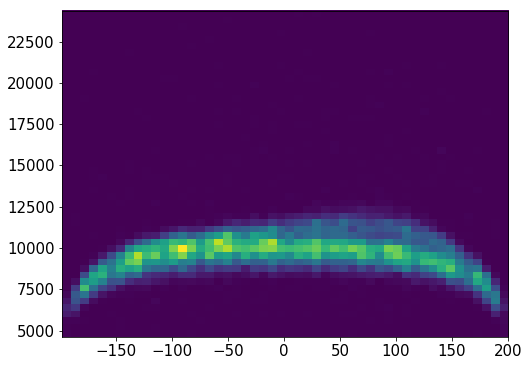

In [29]:
X = XR[(coref.in_range(XR.Y, -80, -50))]
hist2d(X.X.values, X.S2e.values * zcorr(X.Z.values), 50);

# Tracking

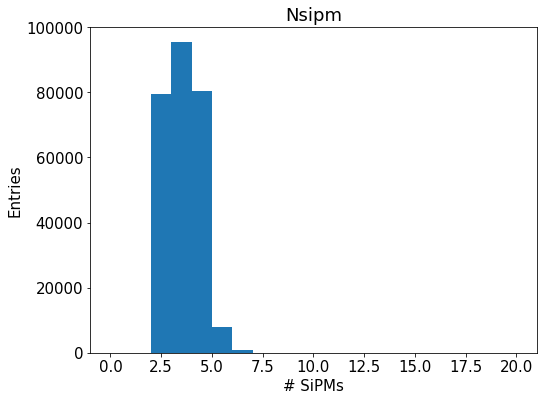

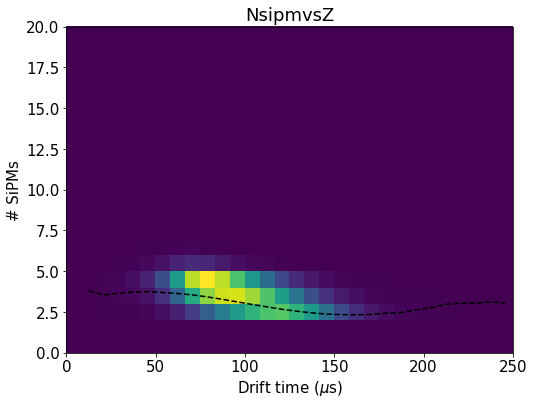

In [30]:
nrange = 0, 20
zrange = zfid

hist(XR.Nsipm, max(nrange), nrange)
labels("# SiPMs", "Entries")
save("Nsipm")

hist2d(XR.Z, XR.Nsipm, (30, max(nrange)), range=(zrange, nrange))
x, y, _ = fitf.profileX(XR.Z, XR.Nsipm, 30, xrange=zrange, yrange=nrange)
plt.plot(x, y, profOpt)

labels("Drift time ($\mu$s)", "# SiPMs")
save("NsipmvsZ")


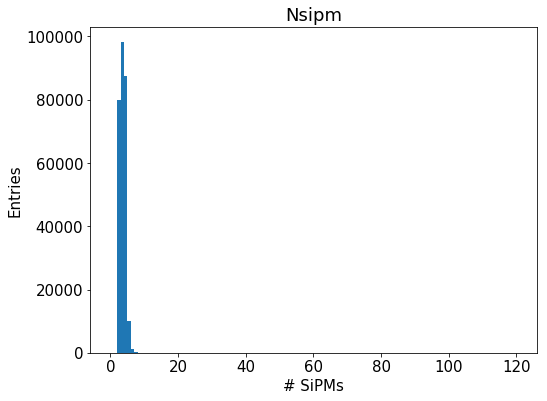

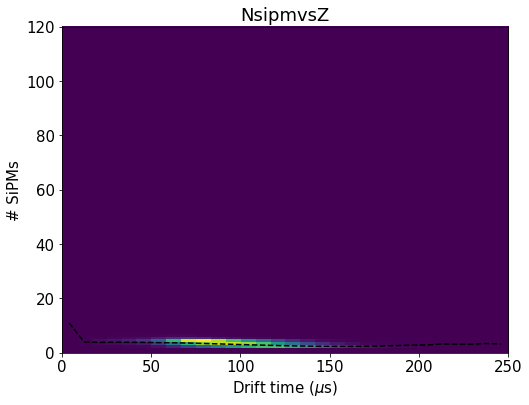

In [31]:
nrange = 0, 120
zrange = zfid

hist(shortZ.Nsipm, max(nrange), nrange)
labels("# SiPMs", "Entries")
save("Nsipm")

hist2d(shortZ.Z, shortZ.Nsipm, (30, max(nrange)), range=(zrange, nrange))
x, y, _ = fitf.profileX(shortZ.Z, shortZ.Nsipm, 30, xrange=zrange, yrange=nrange)
plt.plot(x, y, profOpt)

labels("Drift time ($\mu$s)", "# SiPMs")
save("NsipmvsZ")


# XR distribution

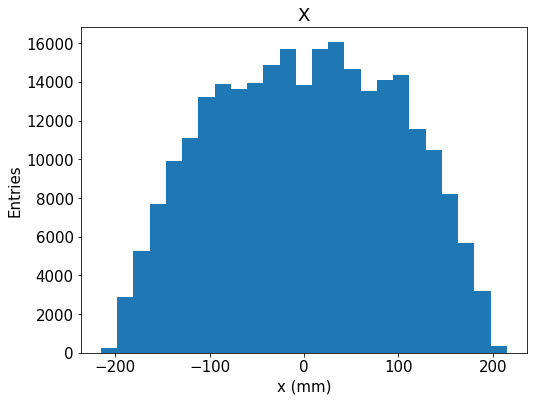

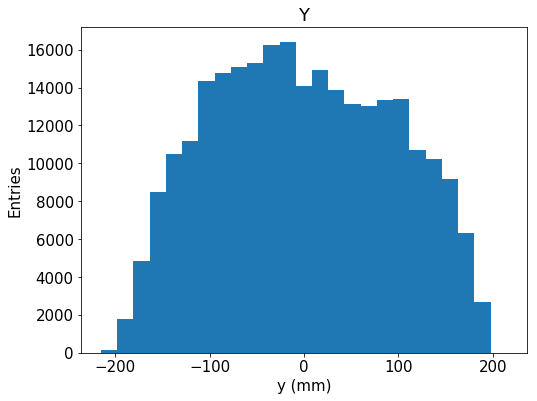

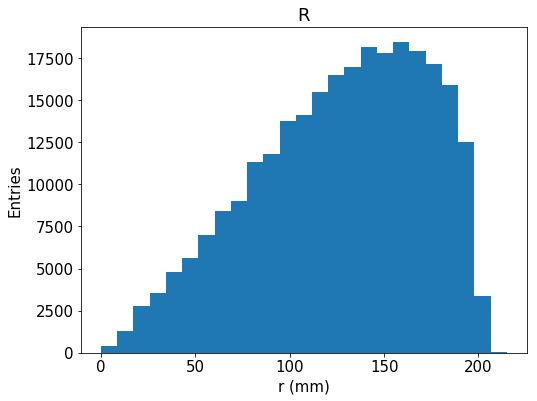

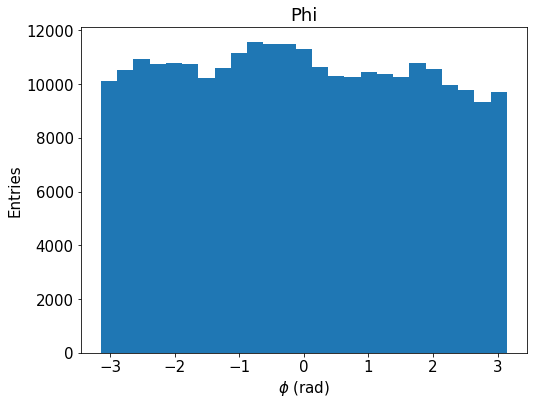

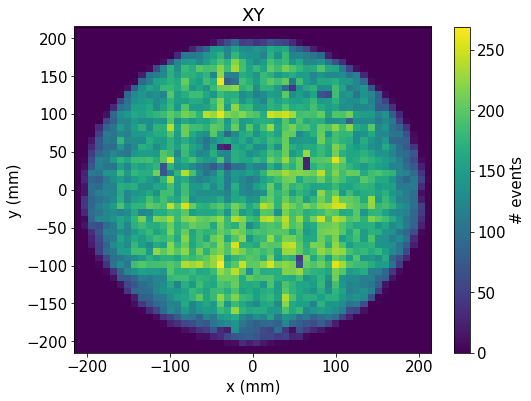

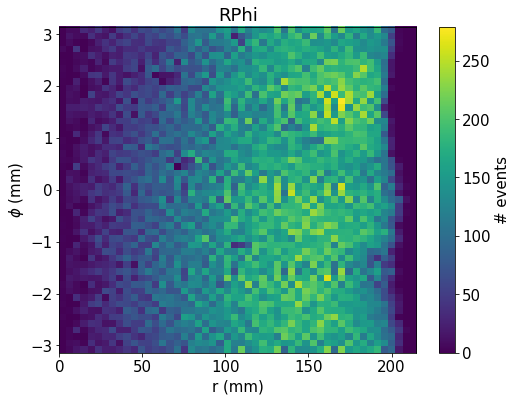

In [32]:
xrange = -215, 215
yrange = -215, 215
rrange =    0, 215
prange = - pi,  pi

hist(XR.X, 25, range=xrange)
labels("x (mm)", "Entries")
save("X")

hist(XR.Y, 25, range=yrange)
labels("y (mm)", "Entries")
save("Y")

hist(XR.R, 25, range=rrange)
labels("r (mm)", "Entries")
save("R")

hist(XR.Phi, 25, range=prange)
labels("$\phi$ (rad)", "Entries")
save("Phi")

nevts, xs, ys, _ = \
hist2d(XR.X, XR.Y, (50, 50), range=(xrange, yrange))
plt.colorbar().set_label("# events")
labels("x (mm)", "y (mm)")
save("XY")

hist2d(XR.R, XR.Phi, (50, 50), range=(rrange, prange))
plt.colorbar().set_label("# events")
labels("r (mm)", "$\phi$ (mm)")
save("RPhi")

# Tracking charge

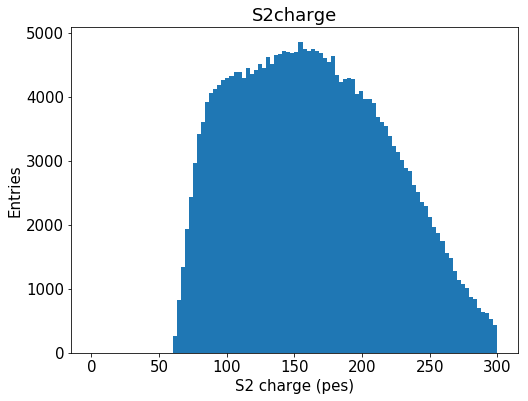

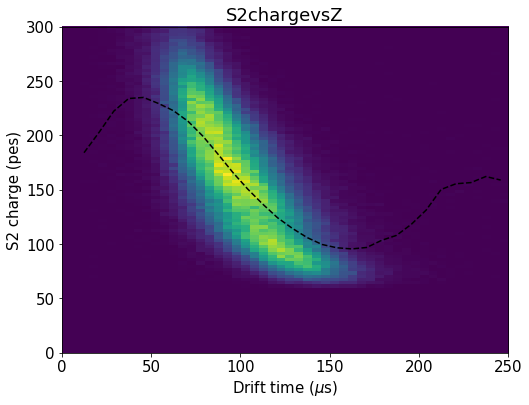

In [33]:
zrange = zfid
Qrange = 0, 300

hist(XR.S2q, 100, range=Qrange)
labels("S2 charge (pes)", "Entries")
save("S2charge")

hist2d(XR.Z, XR.S2q, (50, 100), range=(zrange, Qrange))
x, y, _ = fitf.profileX(XR.Z, XR.S2q, 30, xrange=zrange, yrange=Qrange)
plt.plot(x, y, profOpt)

labels("Drift time ($\mu$s)", "S2 charge (pes)")
save("S2chargevsZ")

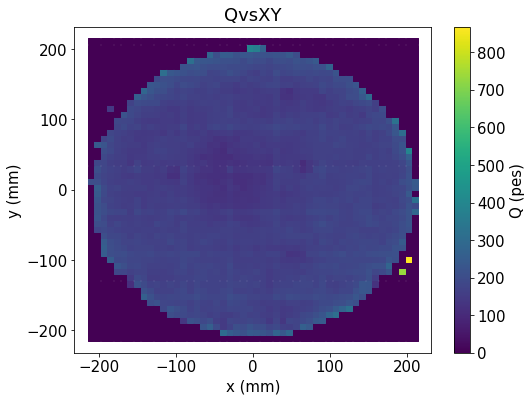

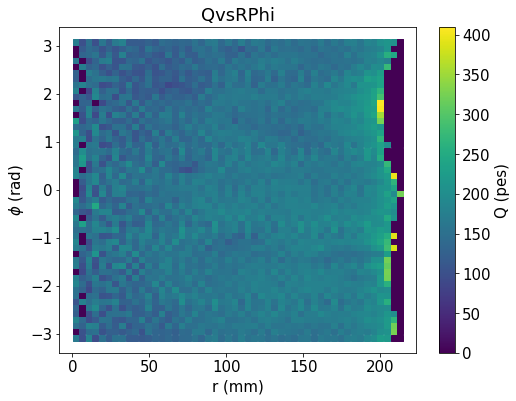

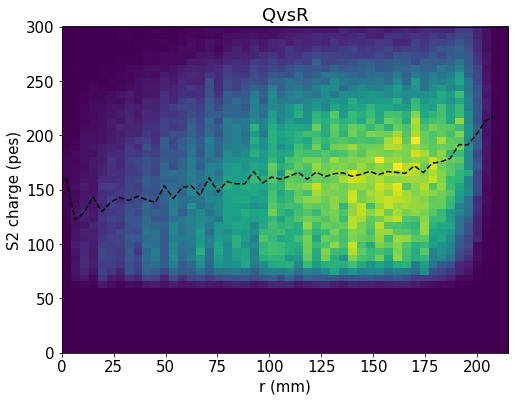

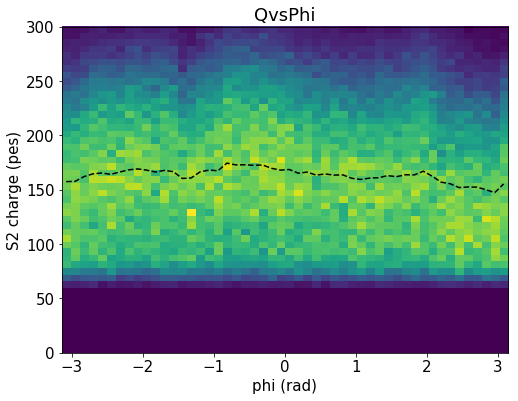

In [34]:
xrange = -215, 215
yrange = -215, 215
rrange =    0, 215
prange = - pi,  pi
Qrange =    0, 300

_, _, cb = profile_and_scatter(XR.X, XR.Y, XR.S2q, (50, 50), xrange=xrange, yrange=yrange)
cb.set_label("Q (pes)")
labels("x (mm)", "y (mm)")
save("QvsXY")

_, _, cb = profile_and_scatter(XR.R, XR.Phi, XR.S2q, (50, 50), xrange=rrange, yrange=prange)
cb.set_label("Q (pes)")
labels("r (mm)", "$\phi$ (rad)")
save("QvsRPhi")

hist2d(XR.R, XR.S2q, (50, 50), range=(rrange, Qrange))
x, y, _ = fitf.profileX(XR.R, XR.S2q, 50, xrange=rrange, yrange=Qrange)
plt.plot(x, y, profOpt)
labels("r (mm)", "S2 charge (pes)")
save("QvsR")

hist2d(XR.Phi, XR.S2q, (50, 50), range=(prange, Qrange))
x, y, _ = fitf.profileX(XR.Phi, XR.S2q, 50, xrange=prange, yrange=Qrange)
plt.plot(x, y, profOpt)
labels("phi (rad)", "S2 charge (pes)")
save("QvsPhi")


# Energy vs position

9834.1871792


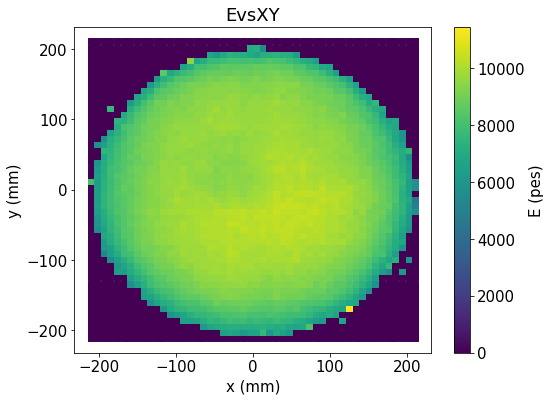

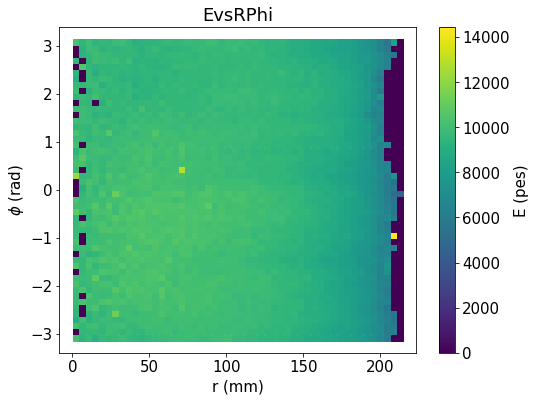

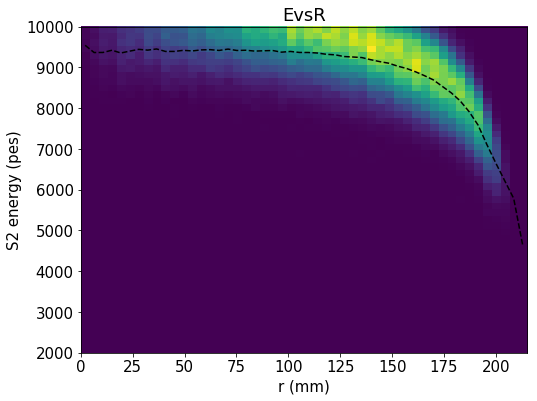

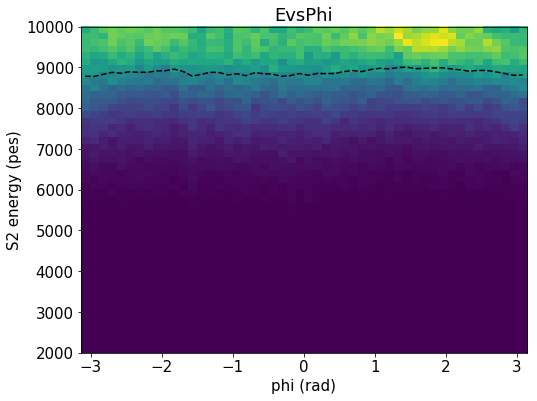

In [35]:
xrange = -215, 215
yrange = -215, 215
rrange =    0, 215
prange = - pi,  pi
Erange =  XRrange

E = XR.S2e * zcorr(XR.Z)

pf, _, cb = profile_and_scatter(XR.X, XR.Y, E, (50, 50), xrange=xrange, yrange=yrange)
cb.set_label("E (pes)")
labels("x (mm)", "y (mm)")
save("EvsXY")

_, _, cb = profile_and_scatter(XR.R, XR.Phi, E, (50, 50), xrange=rrange, yrange=prange)
cb.set_label("E (pes)")
labels("r (mm)", "$\phi$ (rad)")
save("EvsRPhi")

hist2d(XR.R, E, (50, 50), range=(rrange, Erange), weights=E)
x, y, _ = fitf.profileX(XR.R, E, 50, xrange=rrange, yrange=Erange)
plt.plot(x, y, profOpt)
labels("r (mm)", "S2 energy (pes)")
save("EvsR")

hist2d(XR.Phi, E, (50, 50), range=(prange, Erange), weights=E)
x, y, _ = fitf.profileX(XR.Phi, E, 50, xrange=prange, yrange=Erange)
plt.plot(x, y, profOpt)
labels("phi (rad)", "S2 energy (pes)")
save("EvsPhi")

def get_xycorr(xs, ys, es, eref=None):
    if eref is None:
        eref = es[es.shape[0]//2, es.shape[1]//2]
    xs   = xs.reshape(xs.size, 1)
    ys   = ys.reshape(ys.size, 1)
    print(eref)
    def xycorr(x, y):
        x_closest = np.apply_along_axis(np.argmin, 0, abs(x-xs))
        y_closest = np.apply_along_axis(np.argmin, 0, abs(y-ys))
        e = es[x_closest, y_closest]
        e[e<1e3] = eref
        return eref/ e
    return xycorr
xycorr = get_xycorr(*pf[:-1])


# Correction by attachment and position

[  4.99990652e+06   8.20000000e+03   8.00000000e+02   5.00000000e+05
   9.20000000e+03   2.49583849e+02]


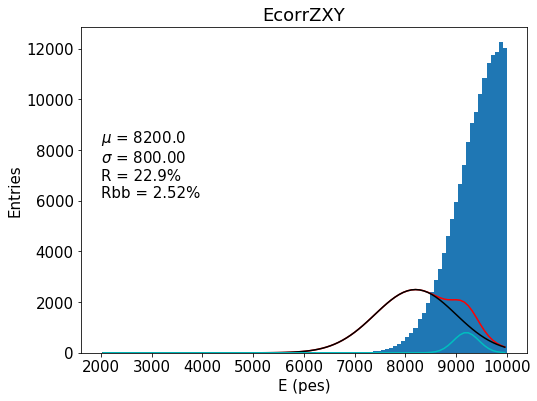

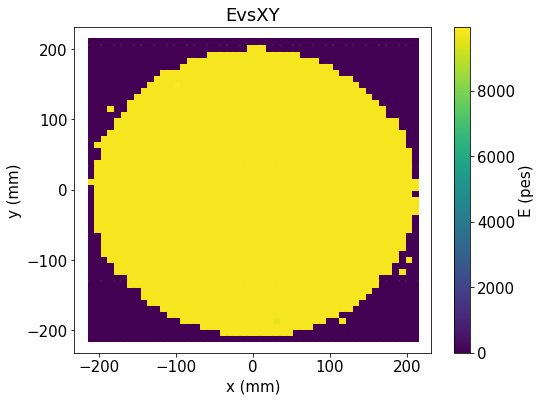

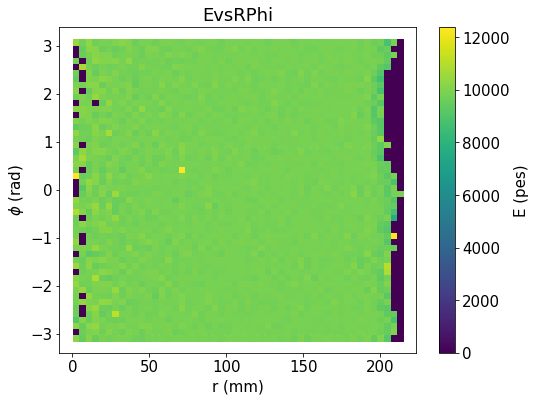

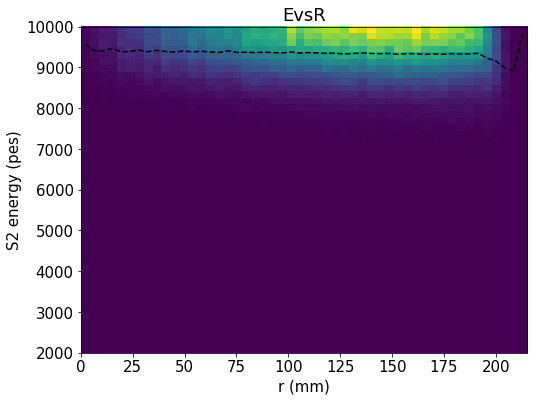

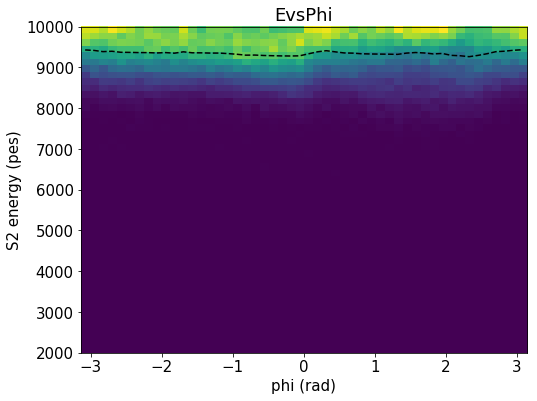

In [36]:
xrange = -215, 215
yrange = -215, 215
rrange =    0, 215
prange = - pi,  pi
Erange =  XRrange

E  = XR.S2e * zcorr(XR.Z) * xycorr(XR.X.values, XR.Y.values)

y, x, _ = hist(E, 100, Erange)

x    = x[:-1] + np.diff(x) * 0.5
fun  = lambda x, *args: fitf.gauss(x, *args[:3]) + fitf.gauss(x, *args[3:])
seed = 1e3, 7500, 100, 1e3, 9000, 200
low  =  10, 7000,  50,  10, 8000, 100
upp  = 5e6, 8200, 800, 5e5, 9200, 800
f    = fitf.fit(fun, x, y, seed, fit_range=(6000, 10000), bounds=(low, upp))
print(f.values)

plt.plot(x, f.fn(x), fitOpt)
plt.plot(x, fitf.gauss(x, *f.values[:3]), XR1Opt)
plt.plot(x, fitf.gauss(x, *f.values[3:]), XR2Opt)
plt.text(Erange[0], max(y)/2, gausstext(f.values[:3]))

labels("E (pes)", "Entries")
save("EcorrZXY")

_, _, cb = profile_and_scatter(XR.X, XR.Y, E, (50, 50), xrange=xrange, yrange=yrange)
cb.set_label("E (pes)")
labels("x (mm)", "y (mm)")
save("EvsXY")

_, _, cb = profile_and_scatter(XR.R, XR.Phi, E, (50, 50), xrange=rrange, yrange=prange)
cb.set_label("E (pes)")
labels("r (mm)", "$\phi$ (rad)")
save("EvsRPhi")

hist2d(XR.R, E, (50, 50), range=(rrange, Erange), weights=E)
x, y, _ = fitf.profileX(XR.R, E, 50, xrange=rrange, yrange=Erange)
plt.plot(x, y, profOpt)
labels("r (mm)", "S2 energy (pes)")
save("EvsR")

hist2d(XR.Phi, E, (50, 50), range=(prange, Erange), weights=E)
x, y, _ = fitf.profileX(XR.Phi, E, 50, xrange=prange, yrange=Erange)
plt.plot(x, y, profOpt)
labels("phi (rad)", "S2 energy (pes)")
save("EvsPhi")


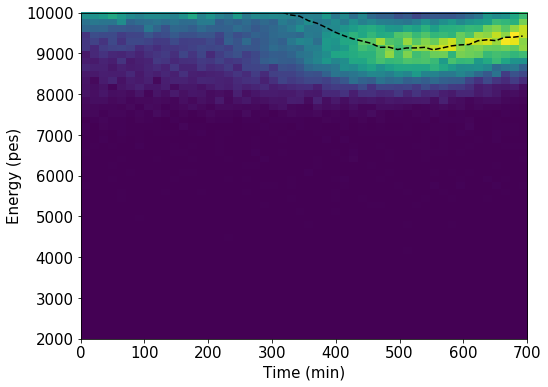

In [37]:
E = XR.S2e * zcorr(XR.Z) * xycorr(XR.X.values, XR.Y.values)
T = (XR.time - np.min(XR.time))/60

Erange = XRrange
Trange = 0, 700

hist2d(T, E, (50, 50), range=(Trange, Erange))

x, y, _ = fitf.profileX(T, E, 50, Trange)
plt.plot(x, y, profOpt)

labels("Time (min)", "Energy (pes)")

def get_timecorr(T, E):
    eref = np.max(E)
    def timecorr(t):
        dt = np.abs(t[:, np.newaxis]-T)
        return eref / E[np.apply_along_axis(np.argmin, 1, dt)]
    return timecorr
tcorr = get_timecorr(x, y)

RuntimeError: Optimal parameters not found: The maximum number of function evaluations is exceeded.

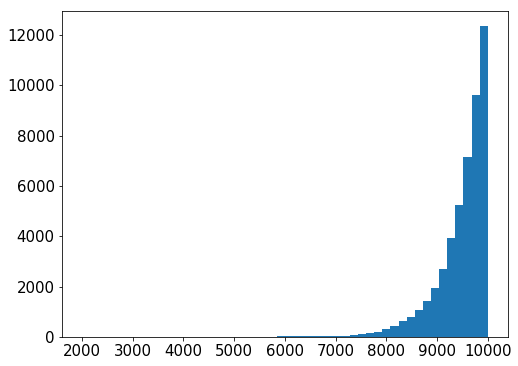

In [38]:
T = (XR.time - np.min(XR.time))/60
E = XR.S2e * zcorr(XR.Z) * xycorr(XR.X.values, XR.Y.values) * tcorr(T)

Trange = 0, 700
Erange = XRrange

y, x, _ = hist(E, 50, Erange)

x = x[:-1] + np.diff(x) * 0.5
fun  = lambda x, *args: fitf.gauss(x, *args[:3]) + fitf.gauss(x, *args[3:])
seed = 1e3, 7500, 100, 1e3, 9000, 200
low  =  10, 7000,  50,  10, 8000, 100
upp  = 5e6, 8200, 800, 5e5, 9200, 800
f    = fitf.fit(fun, x, y, seed, fit_range=(6000, 10000), bounds=(low, upp))
print(f.values)

plt.plot(x, f.fn(x), fitOpt)
plt.plot(x, fitf.gauss(x, *f.values[:3]), XR1Opt)
plt.plot(x, fitf.gauss(x, *f.values[3:]), XR2Opt)
plt.text(Erange[0], max(y)/2, gausstext(f.values[:3]))

labels("E (pes)", "Entries")
save("EcorrZXYT")

hist2d(T, E, (50, 50), range=(Trange, Erange))
x, y, _ = fitf.profileX(T, E, 50, Trange)
plt.plot(x, y, profOpt)

labels("Time (min)", "Energy (pes)")


In [ ]:
PP = shortZ[coref.in_range(shortZ.S1e, 100, 150)]
PP = PP[coref.in_range(PP.S2e, 50e3, 110e3)]
PP = PP[coref.in_range(PP.Y, -30, 30)]
PP = PP[coref.in_range(PP.X, -130, -100)]
PP = PP[coref.in_range(PP.Xrms, 9.2, 10.2)]
PP = PP[coref.in_range(PP.Yrms, 9.2, 10.2)]
PP.head()

In [ ]:
zrange = zfid
Erange = 50e3, 200e3

hist(PP.S2e, 100, Erange)
labels("S2 energy (pes)", "Entries")

hist2d(PP.Z, PP.S2e, 100, (zrange,Erange))
labels("Z (mm)", "S2 energy (pes)")

hist(PP.S2e * zcorr(PP.Z), 100, Erange)
labels("S2 energy (pes)", "Entries")

y, x, _ =\
hist(PP.S2e * zcorr(PP.Z) * xycorr(PP.X.values, PP.Y.values), 100, Erange)

x = x[:-1] + np.diff(x) * 0.5
f = fitf.fit(fitf.gauss, x, y, (1e8, 13e4, 1e3), fit_range=(12e4, 14e4))
plt.plot(x, f.fn(x), fitOpt)


plt.text(Erange[0], 50, gausstext(f.values[:3], 511))

labels("S2 energy (pes)", "Entries")

In [ ]:
hist(PP.Y, 100, (0, 220))

In [ ]:
hist2d(PP.Xrms, PP.Yrms, 20,  ((8, 15), (8, 15)))
labels("X rms (mm)", "Y rms (mm)")

In [ ]:
xrange = -215, 215
yrange = -215, 215
rrange =    0, 215
prange = - pi,  pi
Erange =  PPrange

E = PP.S2e * zcorr(PP.Z)

pf, _, cb = profile_and_scatter(PP.X, PP.Y, E, (50, 50), xrange=xrange, yrange=yrange)
cb.set_label("E (pes)")
labels("x (mm)", "y (mm)")
save("EvsXY")

_, _, cb = profile_and_scatter(PP.R, PP.Phi, E, (50, 50), xrange=rrange, yrange=prange)
cb.set_label("E (pes)")
labels("r (mm)", "$\phi$ (rad)")
save("EvsRPhi")

hist2d(PP.R, E, (50, 50), range=(rrange, Erange), weights=E)
x, y, _ = fitf.profileX(PP.R, E, 50, xrange=rrange, yrange=Erange)
plt.plot(x, y, profOpt)
labels("r (mm)", "S2 energy (pes)")
save("EvsR")

hist2d(PP.Phi, E, (50, 50), range=(prange, Erange), weights=E)
x, y, _ = fitf.profileX(PP.Phi, E, 50, xrange=prange, yrange=Erange)
plt.plot(x, y, profOpt)
labels("phi (rad)", "S2 energy (pes)")
save("EvsPhi")

def get_xycorr(xs, ys, es, eref=None):
    if eref is None:
        eref = es[es.shape[0]//2, es.shape[1]//2]
    xs   = xs.reshape(xs.size, 1)
    ys   = ys.reshape(ys.size, 1)
    print(eref)
    def xycorr(x, y):
        x_closest = np.apply_along_axis(np.argmin, 0, abs(x-xs))
        y_closest = np.apply_along_axis(np.argmin, 0, abs(y-ys))
        e = es[x_closest, y_closest]
        e[e<1e3] = eref
        return eref/ e
    return xycorr
xycorr = get_xycorr(*pf[:-1])


In [ ]:
xrange = -215, 215
yrange = -215, 215
rrange =    0, 215
prange = - pi,  pi
Erange =  PPrange

E  = PP.S2e * zcorr(PP.Z) * xycorr(PP.X.values, PP.Y.values)

y, x, _ = hist(E, 100, Erange)

x    = x[:-1] + np.diff(x) * 0.5
f    = fitf.fit(fitf.gauss, x, y, seed, fit_range=(6000, 10000), bounds=(low, upp))
print(f.values)

plt.plot(x, f.fn(x), fitOpt)
plt.plot(x, fitf.gauss(x, *f.values[:3]), XR1Opt)
plt.plot(x, fitf.gauss(x, *f.values[3:]), XR2Opt)
plt.text(Erange[0], max(y)/2, gausstext(f.values[:3]))

labels("E (pes)", "Entries")
save("EcorrZXY")

_, _, cb = profile_and_scatter(XR.X, XR.Y, E, (50, 50), xrange=xrange, yrange=yrange)
cb.set_label("E (pes)")
labels("x (mm)", "y (mm)")
save("EvsXY")

_, _, cb = profile_and_scatter(XR.R, XR.Phi, E, (50, 50), xrange=rrange, yrange=prange)
cb.set_label("E (pes)")
labels("r (mm)", "$\phi$ (rad)")
save("EvsRPhi")

hist2d(XR.R, E, (50, 50), range=(rrange, Erange), weights=E)
x, y, _ = fitf.profileX(XR.R, E, 50, xrange=rrange, yrange=Erange)
plt.plot(x, y, profOpt)
labels("r (mm)", "S2 energy (pes)")
save("EvsR")

hist2d(XR.Phi, E, (50, 50), range=(prange, Erange), weights=E)
x, y, _ = fitf.profileX(XR.Phi, E, 50, xrange=prange, yrange=Erange)
plt.plot(x, y, profOpt)
labels("phi (rad)", "S2 energy (pes)")
save("EvsPhi")
